<a href="https://www.kaggle.com/code/hsnhamurcu/youtube-and-spotify-data-analysis?scriptVersionId=209044923" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📊🎵 YouTube and Spotify Data Analysis  
#### This project aims to explore music listening trends and user behavior by analyzing datasets from YouTube and Spotify platforms. A comprehensive analysis was conducted using various musical attributes (e.g., `Energy`, `Valence`, `Tempo`) and engagement metrics (e.g., `Views`, `Likes`). 
#### The analysis also includes extensive and important insights and advice for companies.

---

## 🚀 Key Highlights  
- **Most Popular Keys:** 🎹 Tracks in the keys of C (C#), F# (Fa#) and A# (La#) and at 120-150 BPM reached the highest number of views.   
- **Musical Features and Engagement:** 🎧 Relationships between features like `Tempo`, `Energy`, and `Speechiness` and metrics like views and likes were examined.  
- **Licensed & Official Video:** 🏷️ The impact of these content types on view counts was analyzed in detail.  
- **Outlier Cleaning:** 🧹 All outliers were removed across features to enhance the accuracy of the analysis.
- **Filling Missing Values:** 💾 Empty values that can be filled with the RandomForestRegressor model are filled. 
- **Categorization:** 📦 Continuous variables like `Energy`, `Valence`, and `Tempo` were grouped for clearer insights.  

---

## 🧐 Questions Answered  
- Which musical features influence a track's popularity?  
- How do licensed and official video content types shape viewership patterns?  
- Are specific `Tempo` and `Energy` levels more appealing to listeners?
- What are the factors that influence the listener?
- Which are the View based Top 10?  

---

## 📋 Techniques Used  
- **Data Cleaning and Preparation:** Missing and outlier values were addressed prior to analysis(Pandas, RandomForestRegressor, IQR). 
- **Exploratory Data Analysis (EDA):** 📊 Detailed analysis was performed using visualization tools.  
- **Categorization:** Continuous variables were divided into ranges for better comparisons.  
- **Visualizations:** Metrics were visualized using pie charts, histograms, heat maps and scatter plots.  

# ℹ️  ****Columns Information****

**Track**:  
Name of the song, as visible on the Spotify platform.

**Artist**:  
Name of the artist.

**Url_spotify**:  
The URL of the artist.

**Album**:  
The album in which the song is contained on Spotify.

**Album_type**:  
Indicates if the song is released on Spotify as a single or contained in an album.

**Uri**:  
A Spotify link used to find the song through the API.

**Danceability**:  
Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable.

**Energy**:  
A measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Key**:  
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**Loudness**:  
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typically range between -60 and 0 dB.

**Speechiness**:  
Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words, while values between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Acousticness**:  
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Instrumentalness**:  
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 represent instrumental tracks, with higher confidence as the value approaches 1.0.

**Liveness**:  
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Valence**:  
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

**Tempo**:  
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Duration_ms**:  
The duration of the track in milliseconds.

**Stream**:  
Number of streams of the song on Spotify.

**Url_youtube**:  
URL of the video linked to the song on YouTube, if it exists.

**Title**:  
Title of the videoclip on YouTube.

**Channel**:  
Name of the channel that published the video.

**Views**:  
Number of views.

**Likes**:  
Number of likes.

**Comments**:  
Number of comments.

**Description**:  
Description of the video on YouTube.

**Licensed**:  
Indicates whether the video represents licensed content, meaning that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.

**Official_video**:  
Boolean value indicating if the video found is the official video of the song.fficial video of the song.

# ****Libraries****

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# ****Creating Dataset (Youtube and Spotify)****

In [2]:
# After creating the necessary libraries, let's start by creating the data set.

# Importing dataset
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")
df = df_.copy()

# ****Creating Empty Data (%2)****

In [3]:
#Let's create blank values on dataset.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.02)

# ****Dataset review and overview****

In [4]:

# Let's check dataset's shapes.

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 20718 rows and 28 columns in this dataset.


In [5]:
# Let's make a general observation on the dataset. We can also do this observation with .head() and .tail() commands.
# But I choose only the df command because it shows the head and tail data together.
# I use the .T command because it makes observation easier when there are many columns.

df.T

,0,1,2,3,4,5,6,7,8,9,...,20708,20709,20710,20711,20712,20713,20714,20715,20716,20717
Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,20708.0,20709.0,20710.0,20711.0,20712.0,20713.0,20714.0,20715.0,20716.0,20717.0
Artist,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,...,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND
Url_spotify,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...
Track,Feel Good Inc.,Rhinestone Eyes,New Gold (feat. Tame Impala and Bootie Brown),On Melancholy Hill,Clint Eastwood,DARE,New Gold (feat. Tame Impala and Bootie Brown) ...,She's My Collar (feat. Kali Uchis),Cracker Island (feat. Thundercat),Dirty Harry,...,PART OF ME HARDSTYLE (SPED UP),SUMMER TIME SADNESS HARDSTYLE,PART OF ME HARDSTYLE,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),JUST DANCE HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,OUTSIDE HARDSTYLE SPED UP,ONLY GIRL HARDSTYLE,MISS YOU HARDSTYLE
Album,Demon Days,Plastic Beach,New Gold (feat. Tame Impala and Bootie Brown),Plastic Beach,Gorillaz,Demon Days,New Gold (feat. Tame Impala and Bootie Brown) ...,Humanz (Deluxe),Cracker Island (feat. Thundercat),Demon Days,...,PART OF ME HARDSTYLE (SPED UP),SUMMER TIME SADNESS HARDSTYLE,PART OF ME HARDSTYLE,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),JUST DANCE HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,NaN,ONLY GIRL HARDSTYLE,MISS YOU HARDSTYLE
Album_type,album,album,single,album,album,album,single,album,single,NaN,...,single,single,single,single,single,single,single,single,single,single
Uri,spotify:track:0d28khcov6AiegSCpG5TuT,spotify:track:1foMv2HQwfQ2vntFf9HFeG,spotify:track:64dLd6rVqDLtkXFYrEUHIU,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,spotify:track:7yMiX7n9SBvadzox8T5jzT,spotify:track:4Hff1IjRbLGeLgFgxvHflk,spotify:track:2c3KCGq6UojB2c8UAFrRON,spotify:track:3lIxtCaROdRDuTnNBDm3n2,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,spotify:track:2bfGNzdiRa1jXZRdfssSzR,...,spotify:track:6jkEAxBnX2PVchKYH9Y46D,spotify:track:3P48rdupp9trbMA2J2Vsta,spotify:track:19gnl7xN5xAEwDquLNKl76,spotify:track:4pqAkUZlA17gsTxFjP4BDL,spotify:track:2dSNs47vHBSPnsUwpl39nk,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,spotify:track:4jk00YxPtPbhvHJE9N4ddv,NaN,spotify:track:6lOn0jz1QpjcWeXo1oMm0k
Danceability,0.818,0.676,NaN,0.689,0.663,0.76,0.716,0.726,0.741,0.625,...,0.642,0.49,0.519,0.292,0.554,0.582,0.531,0.443,0.417,0.498
Energy,0.705,0.703,0.923,0.739,0.694,0.891,0.897,0.815,0.913,0.877,...,0.949,0.824,0.902,0.692,0.874,0.926,0.936,0.83,0.767,0.938
Key,NaN,8.0,1.0,2.0,10.0,11.0,4.0,11.0,2.0,10.0,...,10.0,1.0,7.0,2.0,1.0,5.0,4.0,4.0,9.0,6.0


In [6]:
# Let's take a look at the columns in general.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20314 non-null  float64
 1   Artist            20326 non-null  object 
 2   Url_spotify       20276 non-null  object 
 3   Track             20270 non-null  object 
 4   Album             20292 non-null  object 
 5   Album_type        20313 non-null  object 
 6   Uri               20301 non-null  object 
 7   Danceability      20309 non-null  float64
 8   Energy            20315 non-null  float64
 9   Key               20301 non-null  float64
 10  Loudness          20290 non-null  float64
 11  Speechiness       20314 non-null  float64
 12  Acousticness      20306 non-null  float64
 13  Instrumentalness  20325 non-null  float64
 14  Liveness          20301 non-null  float64
 15  Valence           20306 non-null  float64
 16  Tempo             20324 non-null  float6

In [7]:
# Let's check the number of Null values in dataset.
# With the result of this code, we will have a general knowledge about Null values.
# This will help us decide what to do next.

df.isnull().sum()

Unnamed: 0           404
Artist               392
Url_spotify          442
Track                448
Album                426
Album_type           405
Uri                  417
Danceability         409
Energy               403
Key                  417
Loudness             428
Speechiness          404
Acousticness         412
Instrumentalness     393
Liveness             417
Valence              412
Tempo                394
Duration_ms          392
Url_youtube          857
Title                859
Channel              855
Views                878
Likes                937
Comments             968
Description         1306
Licensed             858
official_video       847
Stream               992
dtype: int64

In [8]:
# With the Describe command, let's check the quartiles, minimum and maximum values, and average of numerical data.
# If we add include = “all” we will examine all columns, but this is not necessary for now. I only want to examine numeric columns.

df.describe().T



,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20314.0,1.035105e+04,5.985878e+03,0.000000,5.160250e+03,1.034750e+04,1.553575e+04,2.071700e+04
Danceability,20309.0,6.197323e-01,1.651752e-01,0.000000,5.180000e-01,6.370000e-01,7.400000e-01,9.750000e-01
Energy,20315.0,6.355284e-01,2.140237e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20301.0,5.302941e+00,3.577440e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20290.0,-7.673328e+00,4.631697e+00,-46.251000,-8.869000e+00,-6.540000e+00,-4.931000e+00,9.200000e-01
Speechiness,20314.0,9.625919e-02,1.113921e-01,0.000000,3.560000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20306.0,2.911057e-01,2.860826e-01,0.000001,4.520000e-02,1.930000e-01,4.760000e-01,9.960000e-01
Instrumentalness,20325.0,5.598164e-02,1.933290e-01,0.000000,0.000000e+00,2.430000e-06,4.640000e-04,1.000000e+00
Liveness,20301.0,1.937404e-01,1.686423e-01,0.014500,9.420000e-02,1.250000e-01,2.380000e-01,1.000000e+00
Valence,20306.0,5.300591e-01,2.454390e-01,0.000000,3.390000e-01,5.375000e-01,7.270000e-01,9.930000e-01


In [9]:
# At first look, I see that some of the values that should be between 0 and 1 are incorrect.
# I will manipulate this with appropriate methods in the following process.

In [10]:
# With a short summary table, I want get a general overview and decide how much to delete or if I need to fill in.
# With this table we will be able to see the percentage of missing values, the number of unique values, the data type and more.

summary_table = pd.DataFrame({
    "Data Type" : df.dtypes,
    "Missing" : df.isnull().sum(),
    "Missing %" : (df.isnull().sum()/df.count())*100,
    "Unique" : df.nunique(),
    "Count" : df.count(),
})

summary_table

,Data Type,Missing,Missing %,Unique,Count
Unnamed: 0,float64,404,1.988776,20314,20314
Artist,object,392,1.928564,2079,20326
Url_spotify,object,442,2.179917,2078,20276
Track,object,448,2.210163,17501,20270
Album,object,426,2.099349,11774,20292
Album_type,object,405,1.993797,3,20313
Uri,object,417,2.054086,18514,20301
Danceability,float64,409,2.013885,897,20309
Energy,float64,403,1.983756,1264,20315
Key,float64,417,2.054086,12,20301


# ****Maipulation of The Data Set****

In [11]:
# In the numerical columns where I will make inferences, I see that Null values are around 2-6%.
# I might prefer to exclude Null values here because the rate of Null values is very low.
# But it is important to remember that in professional life, this decision is made together with our teammates or according to the upper limit set in the company.
# We can start manipulating our dataset.

In [12]:
# Unnamed: 0 column is useless, so I remove it and reset the index.

df.drop("Unnamed: 0", axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

# Firstly I converted milliseconds to minutes (1 min = 60000 ms) and removed the Duration_ms column because we don't need it.
df["Duration_min"] = df["Duration_ms"] / 60000
df.drop(columns = "Duration_ms", inplace = True)

# And than I identify outliers.

# ****Identification of Outliers****

## For 0-1 Range

In [13]:
# Let's identify the columns with a value between 0-1.
columns_to_check = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence']

# Checking values outside the 0-1 range and printing.
for col in columns_to_check:
    out_of_range = df[(df[col] < 0) | (df[col] > 1)]
    print(f"In the {col} column, {len(out_of_range)} values were found outside the 0-1 range.")
    if not out_of_range.empty:
        print(out_of_range[[col]])
    print('-' * 74)

In the Danceability column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Energy column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Speechiness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Acousticness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Instrumentalness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Liveness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Valence column, 0 values were found outside the 0-1 range.
-----------------------------------------------------------------

In [14]:
# Since there are no outliers in the columns I checked, I will not perform data cleaning. 
# For the other columns I will check, I will determine outlier values with the IQR method. 
# Since I will perform analysis on these columns, I will perform data cleaning by selecting only these columns.

## IQR Method

In [15]:
# Let's check dataset.

df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,Duration_min
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,NaN,-6.679,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,3.710667
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.336217
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,NaN,0.923,1.0,-3.930,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,3.585833
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,3.897783
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,5.682000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,1.577783
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,2.514283
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,NaN,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,NaN,...,NaN,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,2.280700
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,NaN,0.417,0.767,9.0,-4.004,...,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06,1.806450


Total number of outliers in column Duration_min: 785
Lower limit: 1.1915749999999998, Upper limit: 6.014041666666667
-----------------------------------------------------------
Total number of outliers in column Likes: 2511
Lower limit: -729405.5, Upper limit: 1273270.5
-----------------------------------------------------------
Total number of outliers in column Views: 2551
Lower limit: -101310952.625, Upper limit: 173689988.375
-----------------------------------------------------------
Total number of outliers in column Tempo: 63
Lower limit: 32.61749999999999, Upper limit: 204.3255
-----------------------------------------------------------


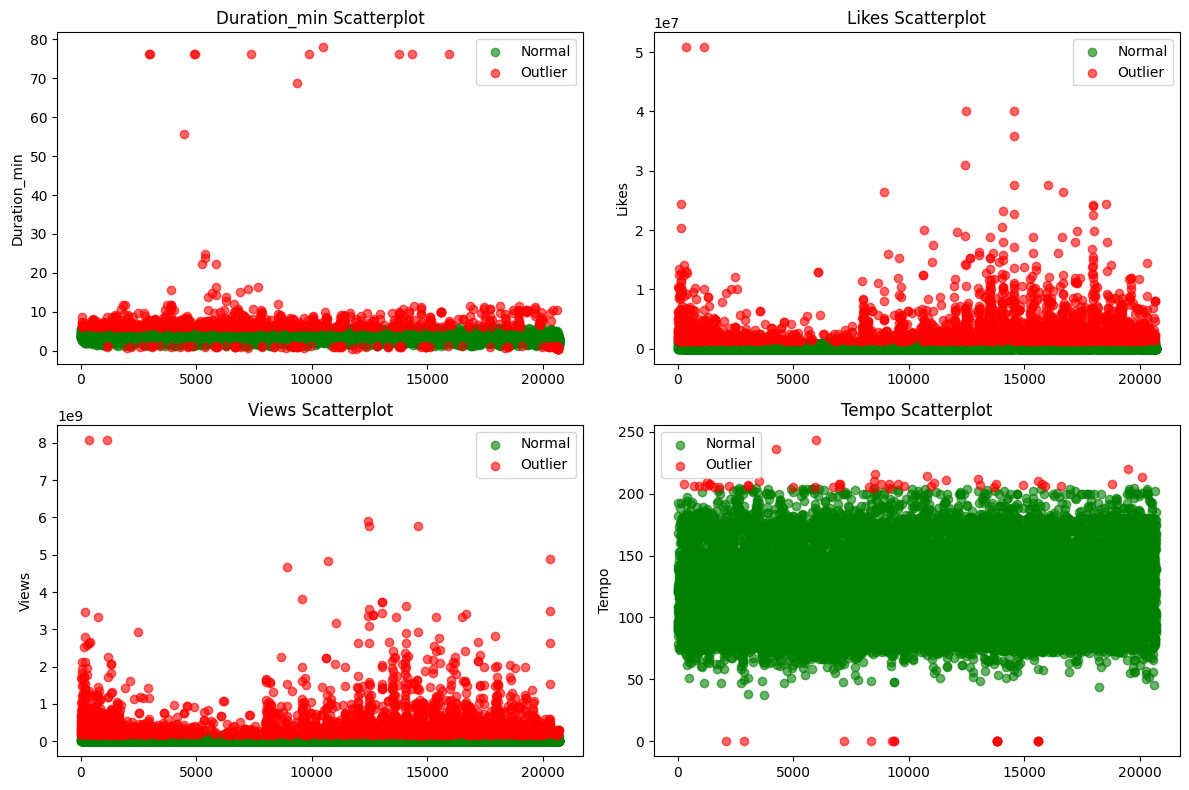

In [16]:
# Now let's check the number of outlier values.
# I prefer the IQR method to determine outlier values. 

# Here I create the necessary function to determine the outlier values with IQR values.
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # I create the variables Upper and Lower bonds.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # I create variables to identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


columns_to_check = ["Duration_min", "Likes", "Views", "Tempo"]

# With Scatterplot I create a graph to show outliers and print their numbers.

plt.figure(figsize = (12, 8))
for i, col in enumerate(columns_to_check, 1):
    # Calculation of lower and upper limits
    outliers, lower, upper = find_outliers_iqr(df, col)

    # I also create normal values with variables to get a better visualization in the graph.
    normal_values = df[(df[col] >= lower) & (df[col] <= upper)]

    # Creating scatterplot
    plt.subplot(2, 2, i)
    plt.scatter(normal_values.index, normal_values[col], label = "Normal", alpha = 0.6, c = "green")
    plt.scatter(outliers.index, outliers[col], label = "Outlier", alpha=0.6, c = "red")
    plt.title(f"{col} Scatterplot")
    plt.ylabel(col)
    plt.legend()

    # I print the lower and upper bounds with the total number of outliers.
    print(f"Total number of outliers in column {col}: {len(outliers)}")
    print(f"Lower limit: {lower}, Upper limit: {upper}")
    print("-" * 59)

plt.tight_layout()
plt.show()

In [17]:
# The outlier values I obtained for Duration_min, Likes, Views columns were not satisfactory. 
# Because when I look at the actual values, I see that there are 8 billion Views and 54 million Likes. Therefore, I will not delete data on Likes and Views columns.
# For the Duration_min column, I will set a value myself and delete accordingly because there are songs longer than 6-7 minutes.
# For the Tempo column, I want to examine in a boxplot graph and make data extraction in this way.

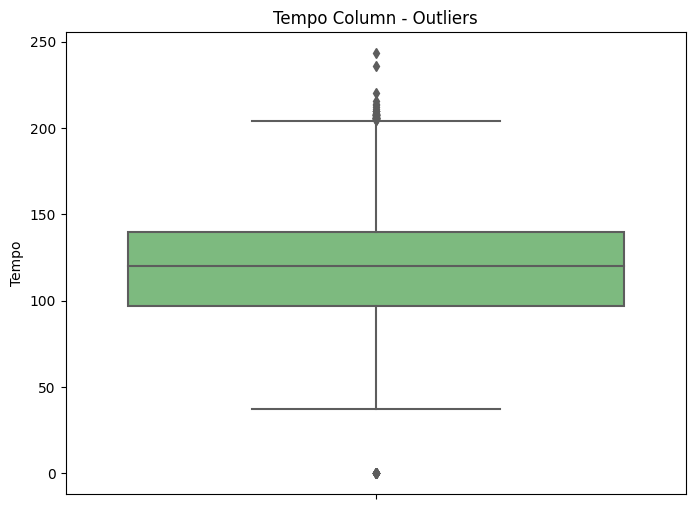

Total number of outliers in the Tempo column: 63


In [18]:
# For the tempo column, we do the IQR operations again, only this time the chart will be different.
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

tempo_outliers, tempo_lower, tempo_upper = find_outliers_iqr(df, "Tempo")

# Let's visualize Outliers with Boxplot.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, y = "Tempo", palette = "Greens")
plt.title("Tempo Column - Outliers")
plt.ylabel("Tempo")
plt.show()

# The code we use to print the outlier number.
print(f"Total number of outliers in the Tempo column: {len(tempo_outliers)}")

In [19]:
# I have found that there are 63 outlier values in the tempo column.
# Let's remove outlier values from dataset.

df = df[(df['Tempo'] >= tempo_lower) & (df['Tempo'] <= tempo_upper)]

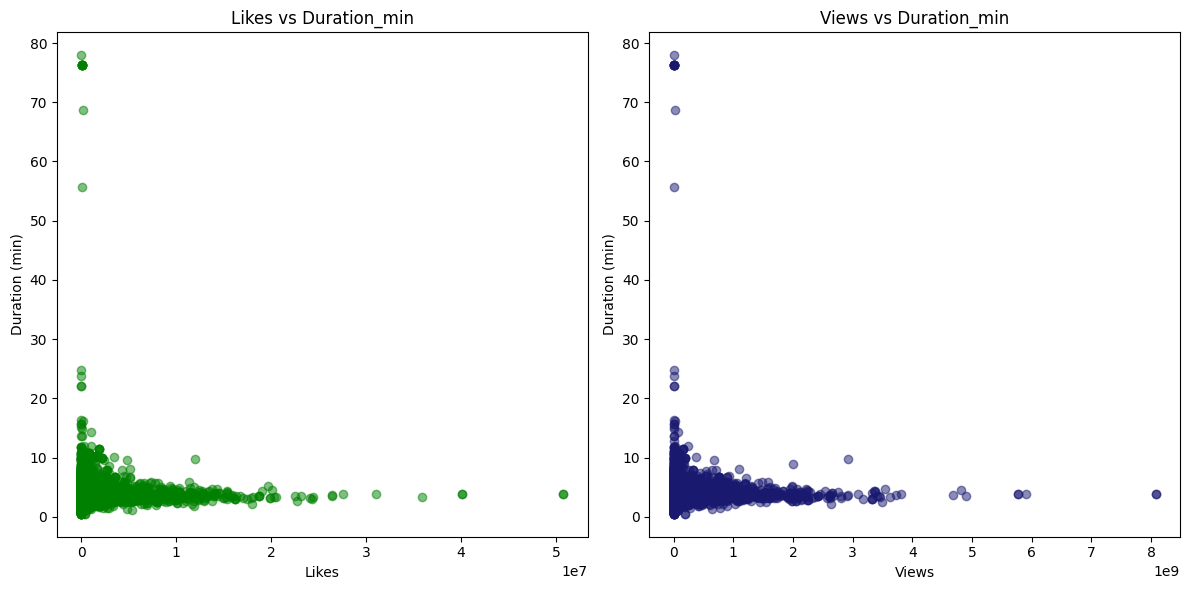

In [20]:
# To determine the outlier values in Duration_min, I will scattering them among themselves. 
# I chose these columns because I will probably do my analysis with one of these 2 columns.

# With this command I set the tables size.
plt.figure(figsize = (12, 6))

# Likes vs Duration_min
plt.subplot(1, 2, 1)
plt.scatter(df["Likes"], df["Duration_min"], color = "green", alpha = 0.5)
plt.title("Likes vs Duration_min")
plt.xlabel("Likes")
plt.ylabel("Duration (min)")

# Views vs Duration_min
plt.subplot(1, 2, 2)
plt.scatter(df["Views"], df["Duration_min"], color = "midnightblue", alpha = 0.5)
plt.title("Views vs Duration_min")
plt.xlabel("Views")
plt.ylabel("Duration (min)")

plt.tight_layout()
plt.show()


In [21]:
# I see a similarity here, but I will address this in the Correlation Matrix section.

In [22]:
# Let's print the numbers above the values specified for the Duration_min column.
duration_thresholds = [20, 15, 10, 7]
for threshold in duration_thresholds:
    count = (df["Duration_min"] > threshold).sum()
    print(f"Number of values above {threshold} minutes for the Duration_min column: {count}")


Number of values above 20 minutes for the Duration_min column: 16
Number of values above 15 minutes for the Duration_min column: 21
Number of values above 10 minutes for the Duration_min column: 71
Number of values above 7 minutes for the Duration_min column: 337


In [23]:
# Given the facts and the significant increase after 10 minutes, I decided that value of 10 minutes for the Duration_min column was appropriate.

# I remove those with more than 10 minutes from the data set.
df = df[df["Duration_min"] <= 10]

In [24]:
# In addition, I would like to point out that we could have chosen to shift the outlier values by one digit or to preserve them by applying other operations. 
# Since I did not perform this analysis with a team, I chose to preserve the accuracy of the data by removing the values.

# ****Identifying and Filling Missing Data (With  Random Forest Regressor)****

In [25]:
# Let's see how much data is left and check the final status with the summary table

df.shape

(19809, 27)

In [26]:
summary_table = pd.DataFrame({
    "Data Type" : df.dtypes,
    "Missing" : df.isnull().sum(),
    "Missing %" : (df.isnull().sum()/df.count())*100,
    "Unique" : df.nunique(),
    "Count" : df.count(),
})

summary_table

,Data Type,Missing,Missing %,Unique,Count
Artist,object,371,1.908633,2079,19438
Url_spotify,object,420,2.166177,2078,19389
Track,object,433,2.234723,16841,19376
Album,object,400,2.060900,11455,19409
Album_type,object,387,1.992586,3,19422
Uri,object,408,2.102984,17771,19401
Danceability,float64,389,2.003090,889,19420
Energy,float64,380,1.955839,1234,19429
Key,float64,393,2.024104,12,19416
Loudness,float64,412,2.124040,9108,19397


In [27]:
# What caught my attention here is that the data types are only object and float64. 
# Storing data in only 2 types will make our analysis a little easier.
# Also, we can see the categorical values in a summary table.

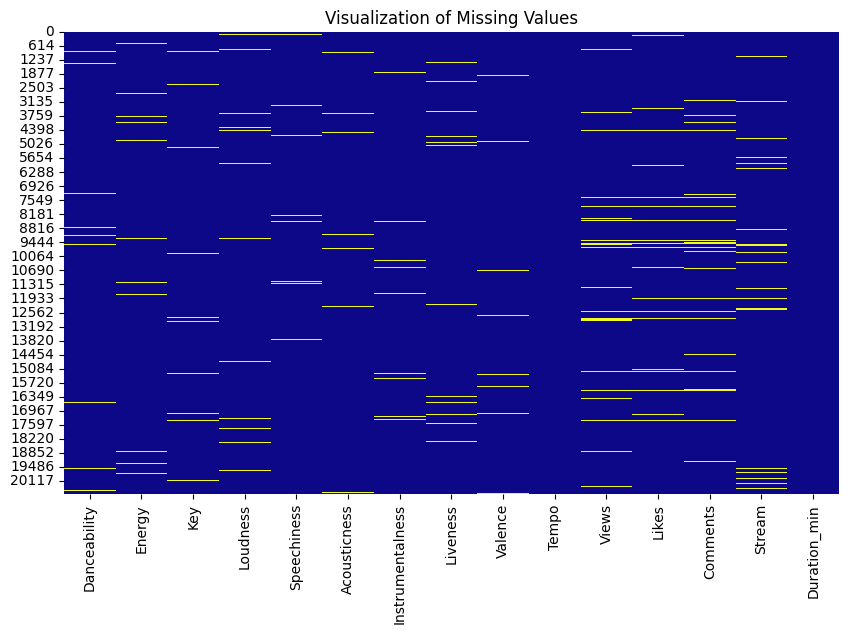

In [28]:
# We can get an overview by seeing the missing values in the numeric columns on the heat map.

# I am creating a variable that returns only numeric columns. Remember, all numeric columns in float64 format! 
numerical_columns = df.select_dtypes(include = "float64").columns

# Creating graphs
plt.figure(figsize = (10, 6))
sns.heatmap(df[numerical_columns].isna(), cbar = False, cmap = "plasma")
plt.title("Visualization of Missing Values")
plt.show()

##  I choose Random Forest Regressor model for filling the missing values. Because:
####    * * By averaging predictions from multiple decision trees, it reduces the risk of overfitting.
####    * * Random Forest handles both linear and nonlinear relationships effectively.
####    * * It can capture complex relationships among numerical features.
####    * * Features with sufficient variance and non-missing values provide strong predictors for imputation.



In [29]:
# Random Forest Regressor for filling missing values.

# I selected only numerical columns for the model.
numerical_columns = df.select_dtypes(include = "float64").columns

# Creating a loop to fill in the missing values.
for col in numerical_columns:
    # Here I select the rows that are not missing to train the model.
    non_missing_data = df[df[col].notna()]
    missing_data = df[df[col].isna()]

    # If the column is completely empty, I use this code to skip it.
    # There are no empty columns in our data set, but I try to use this command for habit.
    if missing_data.empty:
        continue

    # Remove features (columns) that may create noise due to missing values.
    # Feature engineering.
    X = non_missing_data[numerical_columns].drop(columns = [col])
    y = non_missing_data[col]

    X_missing = missing_data[numerical_columns].drop(columns = [col])

    # Excluding Features with Missing Values.
    X = X.dropna(axis = 1)
    X_missing = X_missing[X.columns]

    # Let's standardize features.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_missing_scaled = scaler.transform(X_missing)

    # Let's train the model we created.
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)

    # Let's predicting missing values.
    predictions = model.predict(X_missing_scaled)

    # And finally let's fill the missing values.
    df.loc[df[col].isna(), col] = predictions

# Let's check the results.
print(df.isna().sum())

Artist               371
Url_spotify          420
Track                433
Album                400
Album_type           387
Uri                  408
Danceability           0
Energy                 0
Key                    0
Loudness               0
Speechiness            0
Acousticness           0
Instrumentalness       0
Liveness               0
Valence                0
Tempo                  0
Url_youtube          822
Title                823
Channel              813
Views                  0
Likes                  0
Comments               0
Description         1263
Licensed             814
official_video       805
Stream                 0
Duration_min           0
dtype: int64


In [30]:
# Now that we can see that the empty values are filled, let's start the analysis.

# ****Correlation Matrix, Counting Numerical Columns****

In [31]:
# For the correlation matrix we select only the columns that include numeric values. 
# When we examine the data, all numeric values in the table are in float64 format. 
# So we only select float64 format.

df_numeric = df.select_dtypes(include = ["float64"])

df_numeric.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Views               float64
Likes               float64
Comments            float64
Stream              float64
Duration_min        float64
dtype: object

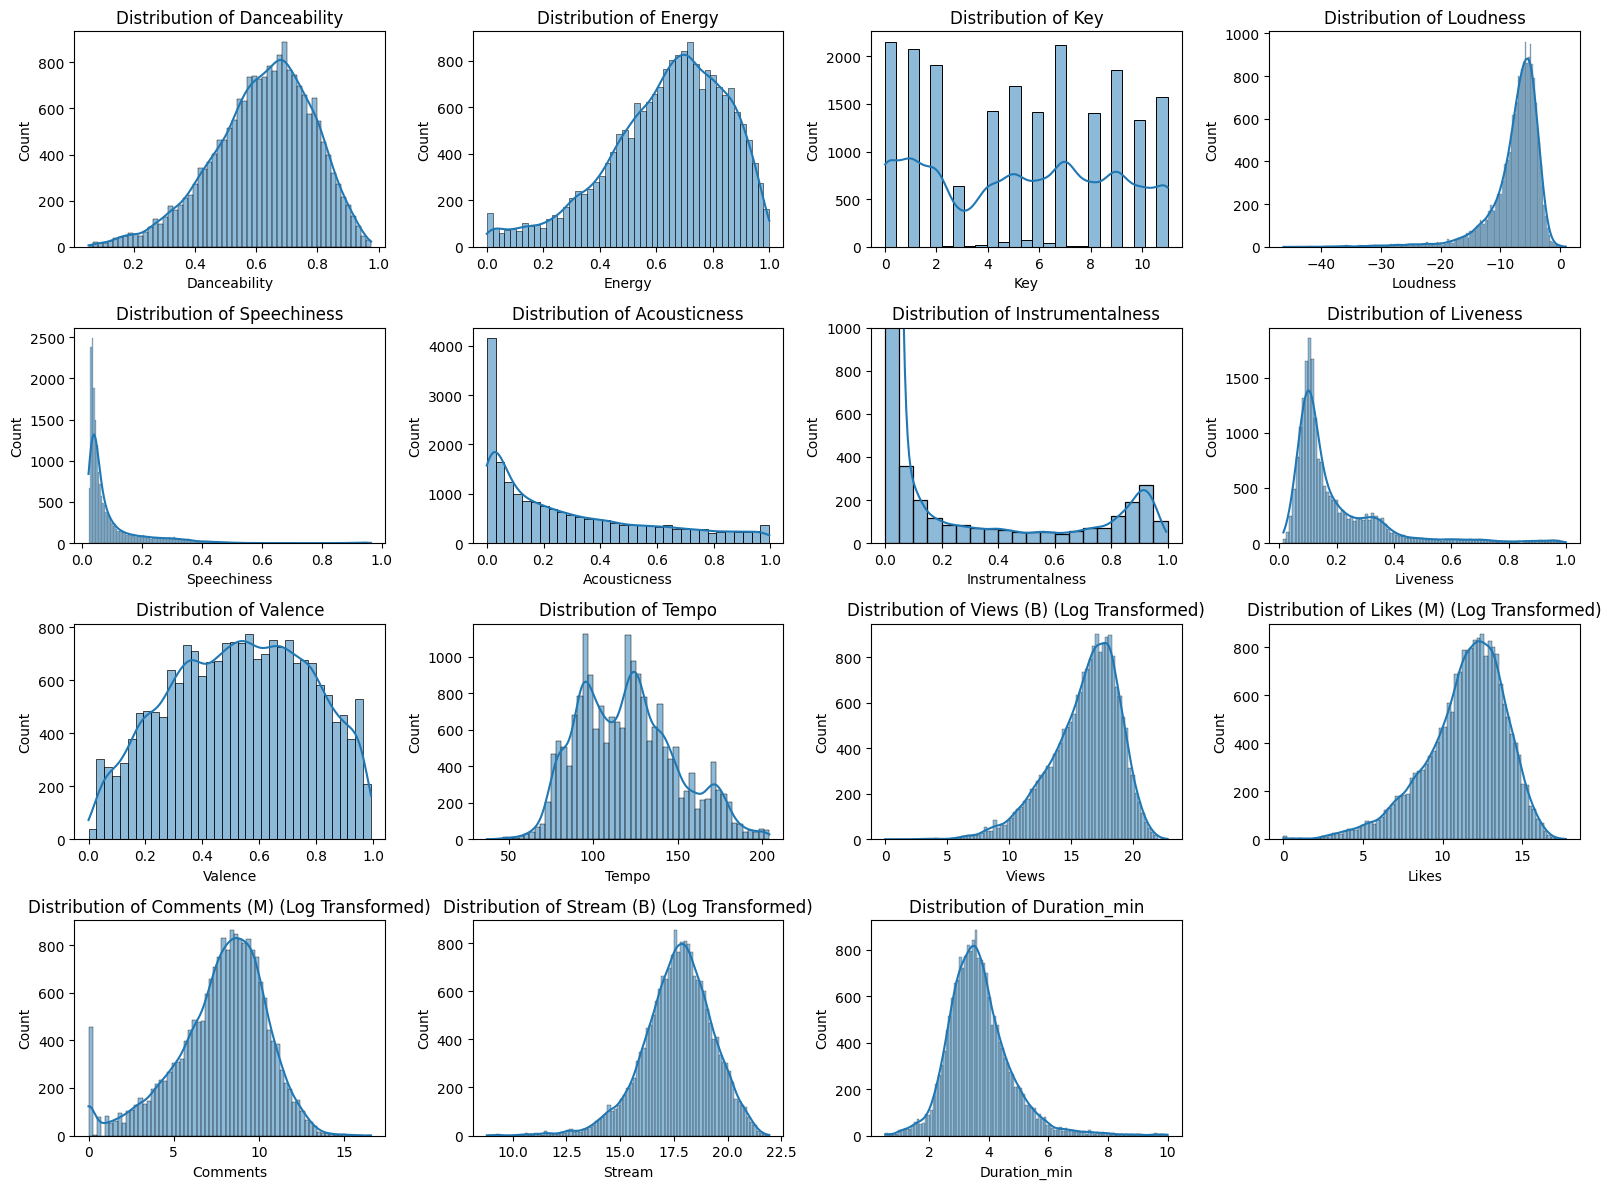

In [32]:
# Let's make a graphical index showing the distribution of numeric columns

# Determine the value for the multiplier (M for Million, B for Billion) expressions shown in the header.
def get_scale_title(col_data, col_name):
    max_val = col_data.max()
    if max_val >= 1e9:
        scale = " (B)"
    elif max_val >= 1e6:
        scale = " (M)"
    else:
        scale = ""
    return f"{col_name}{scale}"

# We logarithmically transformed the columns with large numbers so that the graph can be analyzed.
df_log = df_numeric.apply(lambda x: np.log1p(x) if x.max() > 1e5 else x)

# Let's creat graphs with subplots.
plt.figure(figsize = (16, 12))
for i, col in enumerate(df_log, 1):
    plt.subplot(4, 4, i)
    
    # Special settings for Instrumentalness (0.0 - 0.1 range approximately 17500).
    # Only for Instrumentalness, I set the y-axis limit to 1000.
    if col == "Instrumentalness":
        sns.histplot(df[col], kde = True, binwidth = 0.05)
        plt.ylim(0, 1000)
    else:
        sns.histplot(df_log[col], kde = True)
    
    # The codes we use to show the header and the multiplier scale.
    title = get_scale_title(df_numeric[col], col)
    plt.title(f"Distribution of {title} (Log Transformed)" if df_numeric[col].max() > 1e5 else f"Distribution of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

In [33]:
# Before starting with the correlation matrix, we can quickly find out which columns are similar and get information about the distributions in the tables. For example:
    # Most tracks are around 3.5 minutes long.
    # Almost all of the tracks are not live recordings.

# By the way, the multiples are indicated in the title of the table (M: Million, B: Billion).

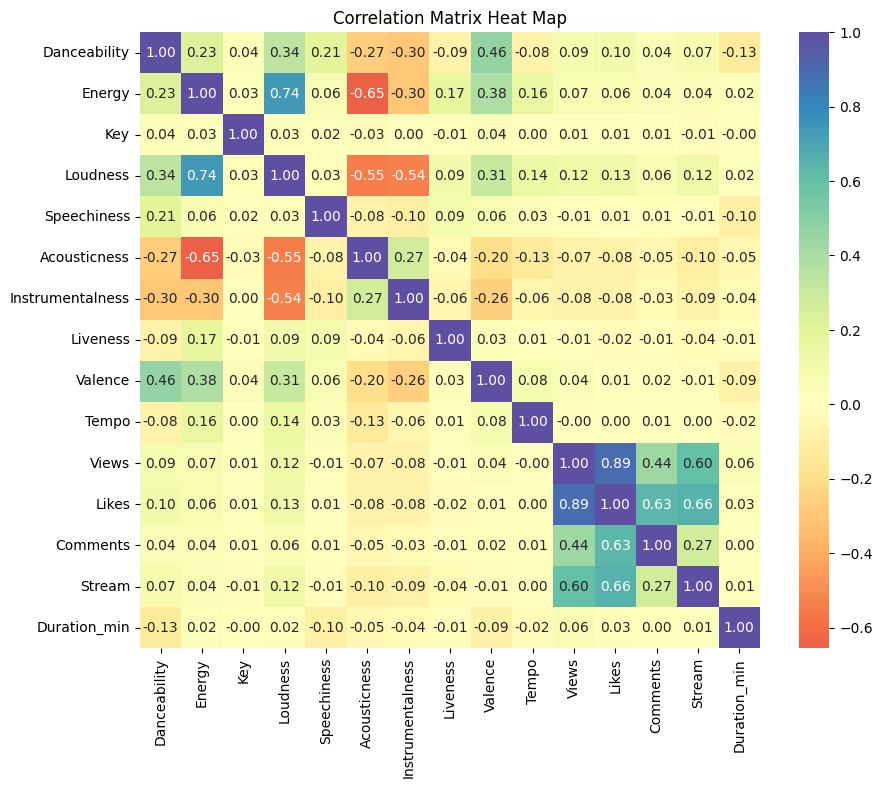

In [34]:
# Good. Now let's create and visualize a correlation matrix.
# With the correlation matrix, we can see the correlations between the columns and decide on the values to use in the analysis.

# Let's create the correlation matrix with the df_numeric column.
corr_matrix = df_numeric.corr()

# Here we visualize the correlation matrix.
# Using a heat map in a correlation matrix facilitates analysis and insight.
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Spectral", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

## ****Examination of Correlation Matrix****

### When we examine the correlation matrix, we see a strong positive correlation between the Likes column and the Views column, while there is a moderate correlation with the Stream and Comments columns. Based on this, it can be said that songs that are listened to more on Youtube receive more likes. I see that songs with a higher number of likes have a higher number of streams on Spotify. 

### There is also a strong positive correlation between Energy and Loudness, meaning that songs with higher energy can be considered as louder songs. On the contrary, we observe a moderate negative correlation between Energy and Acousticity.  Based on this, we can infer that noisy songs are far from being acoustic, and the matrix confirms this idea.

### Based on all these, I will use the Views column for my analysis among the Stream, Likes and Views columns, as I find the correlation between them sufficient. I will also choose the Energy column between the Energy and Loudness columns.

# ****Data Analys****

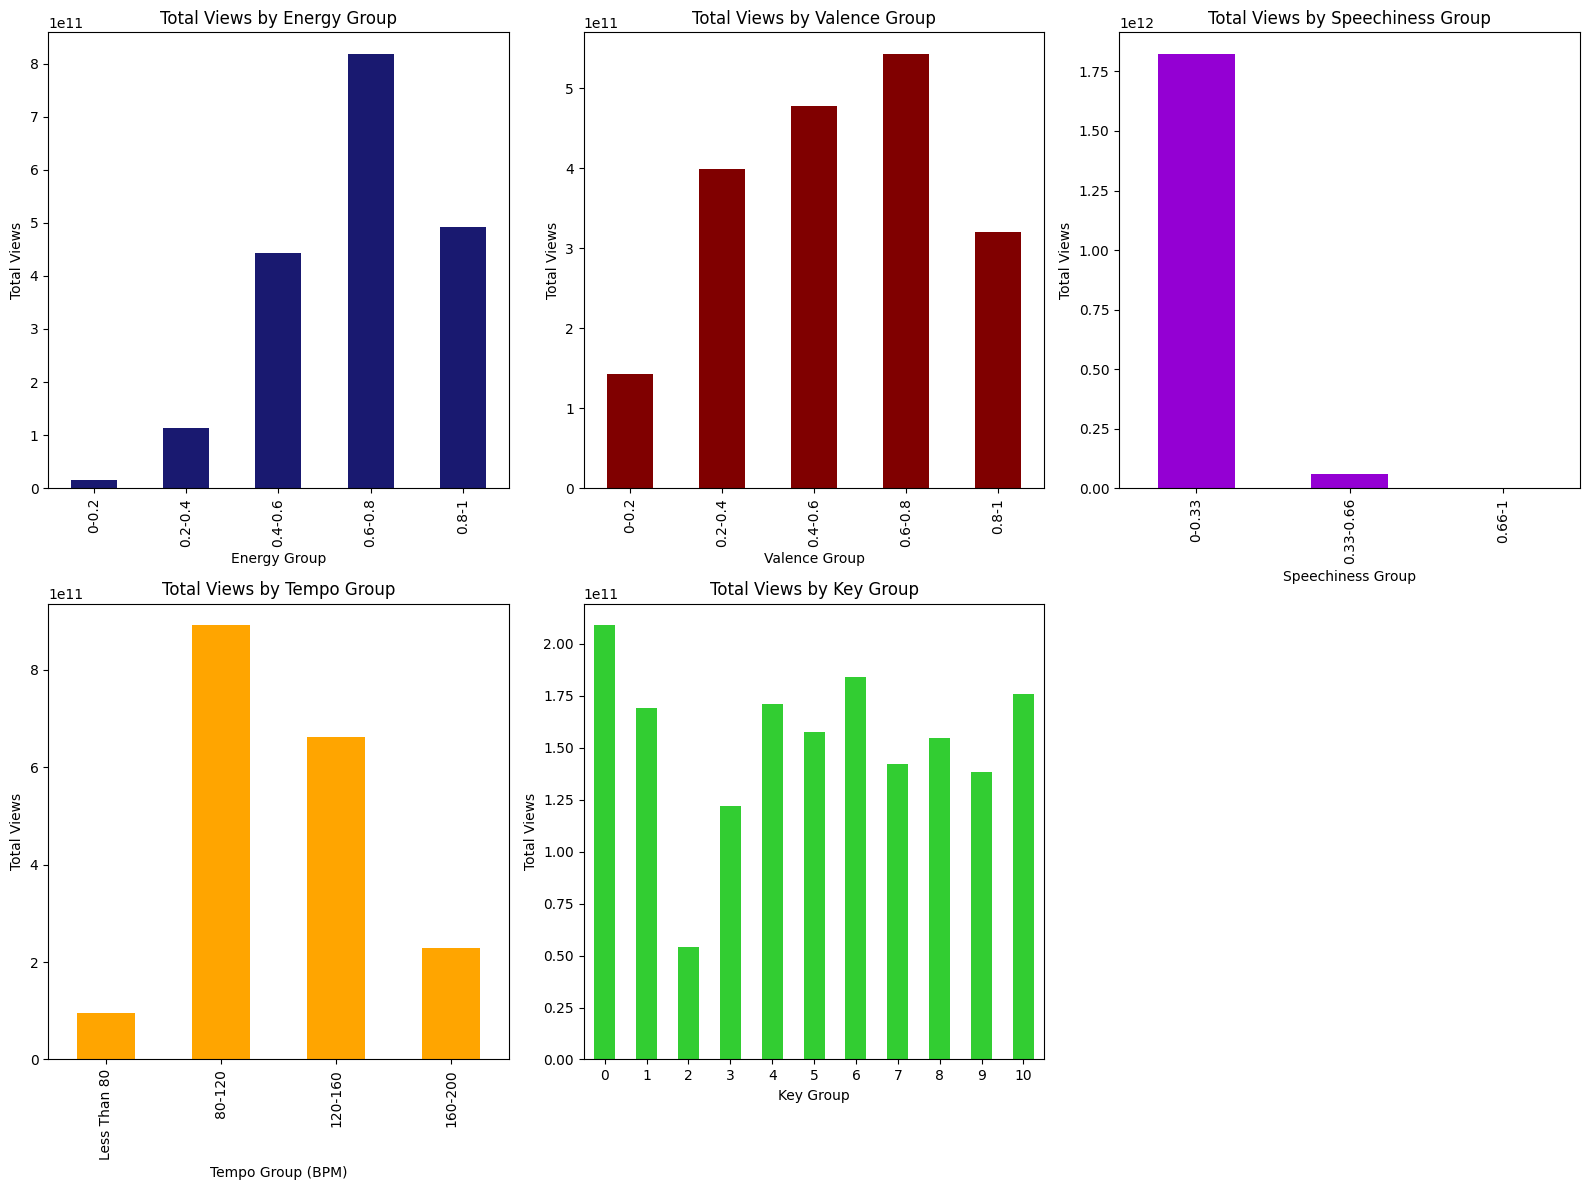

In [35]:
# Energy, Valence, Speechiness, Tempo and Key analysis based on total Views.

# Before starting the analysis, let's create Bins for columns according to the column information given in the entry. 
energy_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
valence_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
speechiness_bins = [0, 0.33, 0.66, 1]
tempo_bins = [0, 80, 120, 160, 200]

# Grouping the features into bins
df["Energy_group"] = pd.cut(df["Energy"], bins = energy_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
df["Valence_group"] = pd.cut(df["Valence"], bins = valence_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
df["Speechiness_group"] = pd.cut(df["Speechiness"], bins = speechiness_bins, labels = ["0-0.33", "0.33-0.66", "0.66-1"])
df["Tempo_group"] = pd.cut(df["Tempo"], bins = tempo_bins, labels = ["Less Than 80", "80-120", "120-160", "160-200"])
df["Key_group"] = pd.cut(df["Key"], bins = range(0, 12), labels = [f"{i}" for i in range(11)])

# Now that we have done the grouping, let's start visualization
plt.figure(figsize = (16, 12))

# Energy
plt.subplot(2, 3, 1)
df.groupby("Energy_group")["Views"].sum().plot(kind = "bar", color = "midnightblue")
plt.title("Total Views by Energy Group")
plt.xlabel("Energy Group")
plt.ylabel("Total Views")

# Valence
plt.subplot(2, 3, 2)
df.groupby("Valence_group")["Views"].sum().plot(kind = "bar", color = "maroon")
plt.title("Total Views by Valence Group")
plt.xlabel("Valence Group")
plt.ylabel("Total Views")

# Speechiness
plt.subplot(2, 3, 3)
df.groupby("Speechiness_group")["Views"].sum().plot(kind = "bar", color = "darkviolet")
plt.title("Total Views by Speechiness Group")
plt.xlabel("Speechiness Group")
plt.ylabel("Total Views")

# Tempo
plt.subplot(2, 3, 4)
df.groupby("Tempo_group")["Views"].sum().plot(kind = "bar", color = "orange")
plt.title("Total Views by Tempo Group")
plt.xlabel("Tempo Group (BPM)")
plt.ylabel("Total Views")

# Key
plt.subplot(2, 3, 5)
df.groupby("Key_group")["Views"].sum().plot(kind = "bar", color = "limegreen")
plt.title("Total Views by Key Group")
plt.xlabel("Key Group")
plt.ylabel("Total Views")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

In [36]:
# Music that is not very energetic but has above average energy has more views and therefore more likes and streams. 
    # If the person concerned is a songwriter, they can gain popularity faster by making songs in this style. 
    # If the relevant person is a Spotify or YouTube executive, this information can be used to take appropriate actions for the advertising campaign or sales policy.

# The same goes for the Valance value. 
    # Positive songs that can be called cheerful and enthusiastic above average have more views, but songs with average and below average emotions are preferred more than the most positive or most negative tracks. 
    # In order not to take risks, it would be better to keep the emotional balance at the average. Highlighting such tracks will increase the number of views and streams.

# When we examine the Speechiness group, the most preferred tracks are the ones where music is at the forefront and lyrics are few.

# While the tempo values most preferred by people are in the 80-160 BPM range, the most preferred key is C (Do), followed by C# (Do#), F# (Fa#) and A# (La#) with almost equal data. 
    # With this data, we observe that listeners are more interested in certain tones. If we analyze these 3 keys, the results will make more sense. 
    # C# (Do#) creates a bright, lively and cheerful atmosphere. It is the key commonly used by Hüseyni Makam in Turkish Art Music and has a calming and melodic structure.
    # F# (Fa#) offers peaceful and elegant tones and is commonly used in the Rast Makam in Turkish Art Music, which I also love to listen to and play on the violin. 
    # Finally, A# (La#) can be preferred to provide strong emotional intonations. It matches the Segah Makam in Turkish art music and creates a more melancholic mood.

# In the light of all this information, the person concerned can choose according to the actions to be taken and achieve the best efficiency.

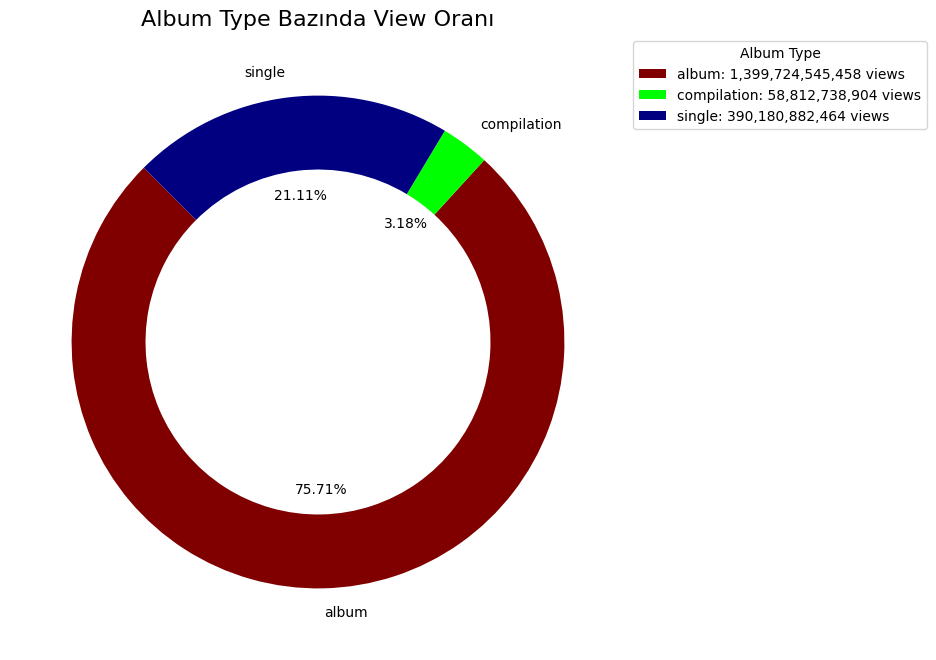

In [37]:
# Let's see the sum of View values based on Album_type with Donut Chart.

# First, I group by creating the album_views variable
album_views = df.groupby("Album_type")["Views"].sum()

# Now let's create the Donut Chart.
plt.figure(figsize = (8, 8))

plt.pie(album_views, labels = album_views.index, autopct = "%1.2f%%", startangle = 135, colors = ["maroon", "lime", "navy"], wedgeprops = dict(width = 0.3))
plt.title("Album Type Bazında View Oranı", fontsize = 16)
plt.legend(labels = [f"{label}: {value:,.0f} views" for label, value in zip(album_views.index, album_views)],
           title = "Album Type", loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1))
plt.show()

In [38]:
# We see that tracks released as albums have more views. 
# Even if all of the data we extracted from the dataset were singles, album tracks would still be dominant.

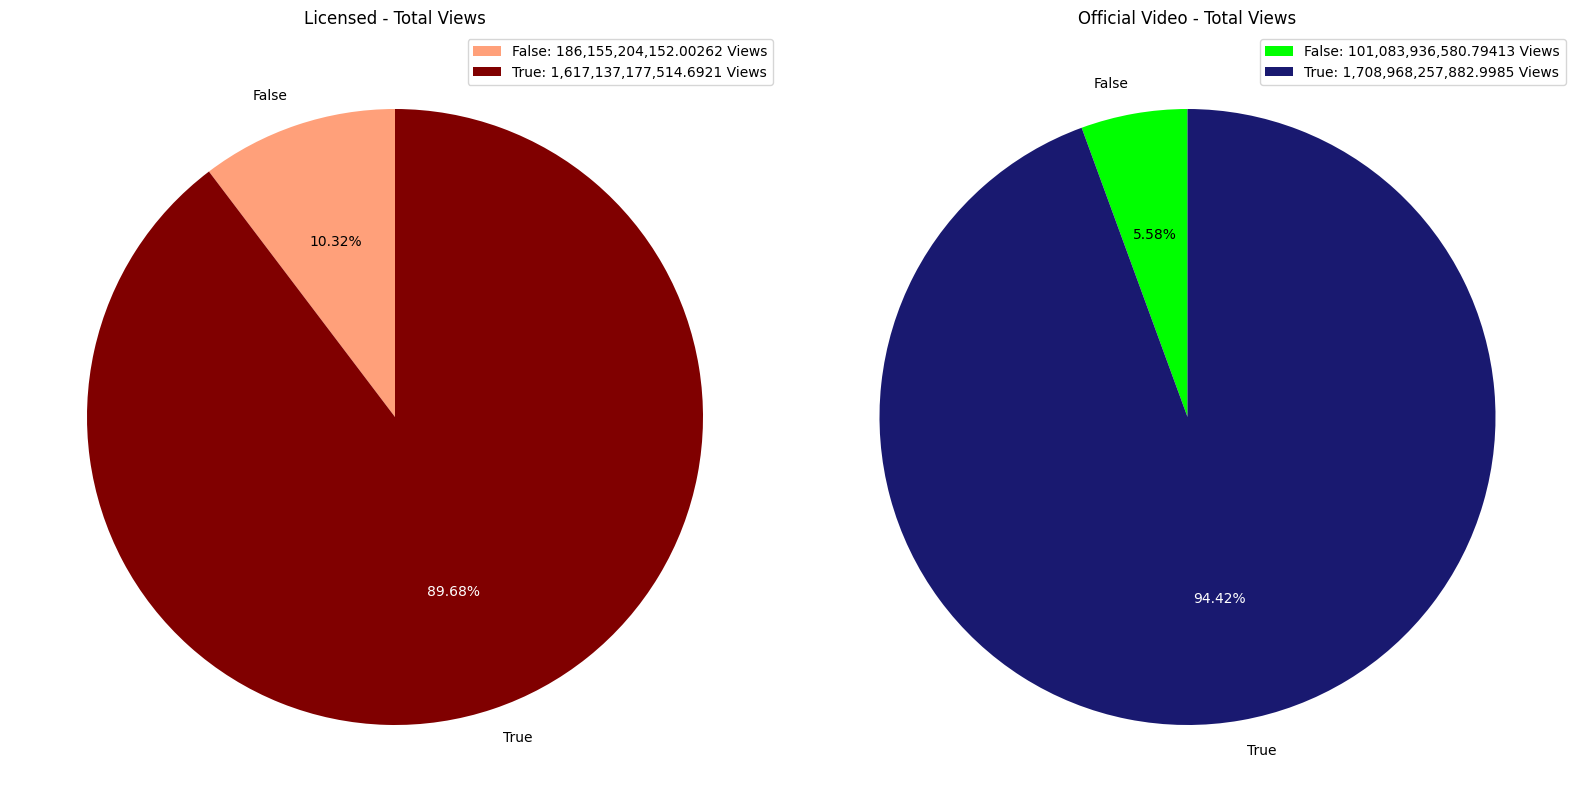

In [39]:
# Let's check on the pie chart how the total number of views is affected in Licensed and Official cases.

# I set it to show all percentages with the special autopct function.
def custom_autopct(pct, colors):
    return f"{pct:.2f}%"

# Let's calculate total Views by grouping Licensed and official_video columns
licensed_views = df.groupby("Licensed")["Views"].sum()
official_video_views = df.groupby("official_video")["Views"].sum()

# Editing charts size
plt.figure(figsize=(16, 8))

# Let's create Licensed pie chart
plt.subplot(1, 2, 1)
colors_licensed = ["lightsalmon", "maroon"]
wedges, texts, autotexts = plt.pie(
    licensed_views,
    labels=licensed_views.index,
    autopct=lambda pct: custom_autopct(pct, colors_licensed),
    startangle=90,
    colors=colors_licensed,
)
# To make the percentage expressions more visible in the chart, I set their colors according to the background color.
for text, color in zip(autotexts, colors_licensed):
    text.set_color("white" if color == "maroon" else "black")
plt.title("Licensed - Total Views")
plt.legend(
    [f"{label}: {views:,} Views" for label, views in zip(licensed_views.index, licensed_views)],
    loc="best",
)

# Creating official_video pie chart
plt.subplot(1, 2, 2)
colors_official = ["lime", "midnightblue"]
wedges, texts, autotexts = plt.pie(
    official_video_views,
    labels=official_video_views.index,
    autopct=lambda pct: custom_autopct(pct, colors_official),
    startangle=90,
    colors=colors_official,
)
# I do the same for the percentage expressions to more visible.
for text, color in zip(autotexts, colors_official):
    text.set_color("white" if color == "midnightblue" else "black")
plt.title("Official Video - Total Views")
plt.legend(
    [f"{label}: {views:,} Views" for label, views in zip(official_video_views.index, official_video_views)],
    loc="best",
)

plt.tight_layout()
plt.show()

In [40]:
# As a result of this information, the importance of the part manufacturers producing official content and the importance of obtaining copyrights can be emphasized. 
# This information can be presented supporting with graphic.

### Top 10 Anaysis

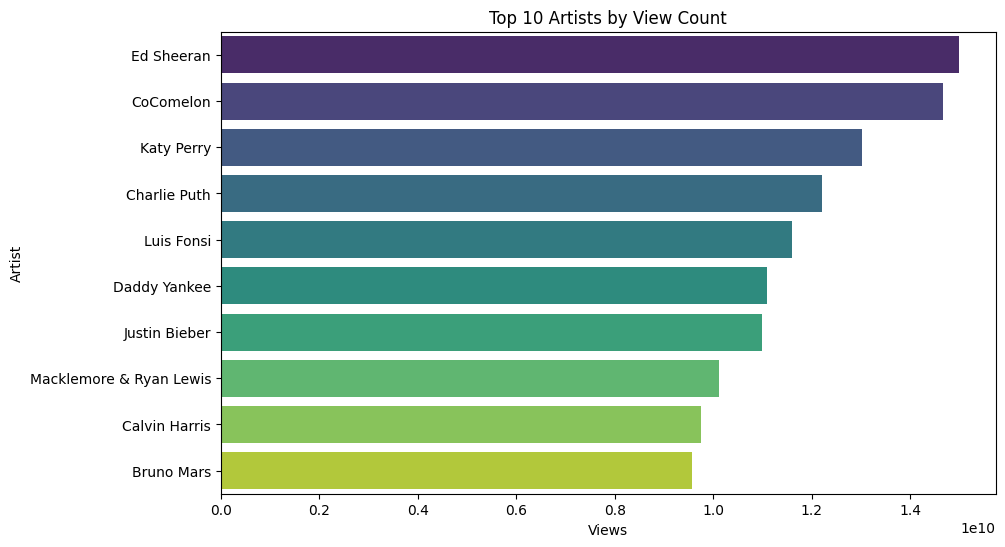

In [41]:
# Now, Let's examine Top 10s. Prizes for you Top 10s! :)

# Top 10 Artist by Views
top10_artist_views = df.groupby("Artist")["Views"].sum().nlargest(10)

# We will analyze the Top 10s on a horizontal bar chart 
plt.figure(figsize = (10, 6))
sns.barplot(x = top10_artist_views.values, y = top10_artist_views.index, palette = "viridis")
plt.title("Top 10 Artists by View Count")
plt.xlabel("Views")
plt.ylabel("Artist")

plt.show()

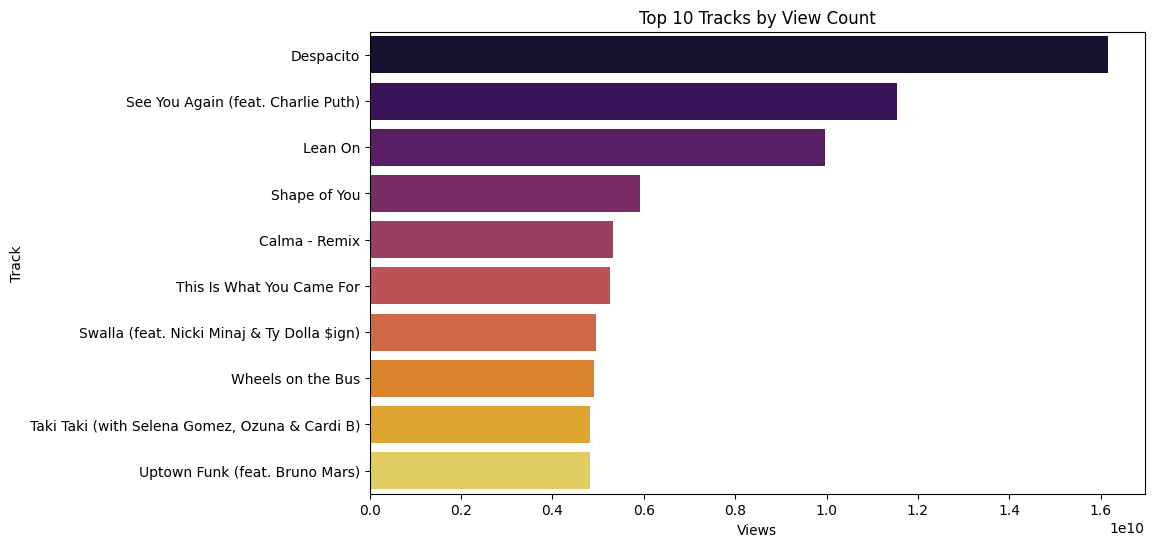

In [42]:
# Top 10 Track by Views
top10_track_views = df.groupby("Track")["Views"].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = top10_track_views.values, y = top10_track_views.index, palette = "inferno")
plt.title("Top 10 Tracks by View Count")
plt.xlabel("Views")
plt.ylabel("Track")
plt.show()

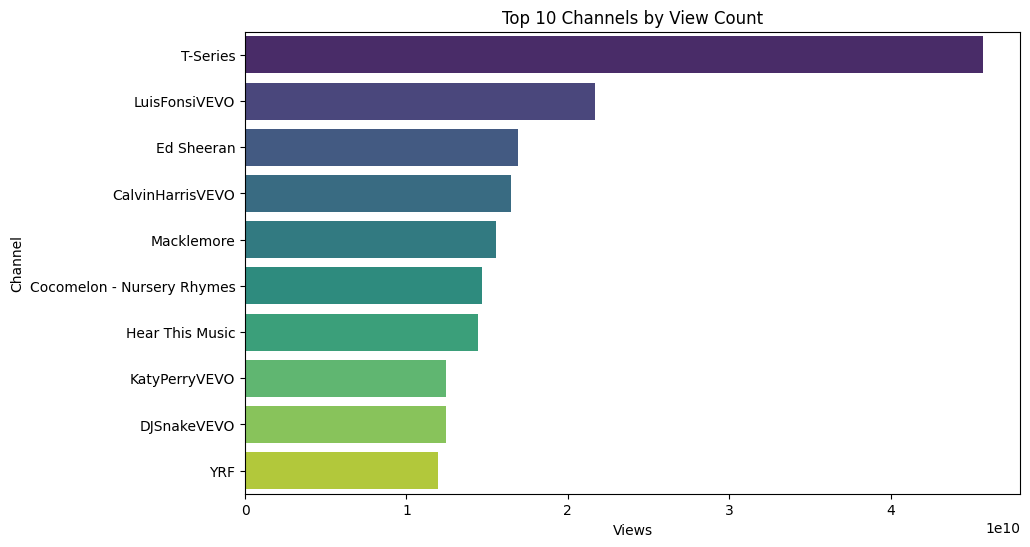

In [43]:
# Top 10 Channel by Views
top10_channel_views = df.groupby("Channel")["Views"].sum().nlargest(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = top10_channel_views.values, y = top10_channel_views.index, palette = "viridis")
plt.title("Top 10 Channels by View Count")
plt.xlabel("Views")
plt.ylabel("Channel")
plt.show()

# ****Overall Analysis****
### We can announce the Top 10 regularly on Youtube and Spotify pages and we can also create a small reward system for these achievements. 
### Prizes or badges can be awarded to those with a total of 21 awards (this limit can be adjusted). 
### We could even scale up and make smaller channels more competitive among themselves. 
### This can be a move that can increase sharing and interaction by creating competition between channels or artists. 
### In this way, channels will advertise themselves and this will result in more users.